## Import The Important Libraries 

In [68]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# For Scalling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## For K-Means 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

## For Agloromative 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

## For DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
np.set_printoptions(suppress=True)

## For PCA
from sklearn.decomposition import PCA

## For LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## For world map 
import plotly.express as px

## To Remove Warnings 
import warnings
warnings.filterwarnings('ignore')

**PROBLEM STATEMENT**

**Objective:** To categorise the countries using socio-economic and health factors that determine the overall development of the country.
About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.


**Problem Statement:** HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the mos


## Load The Dataset

In [69]:
data=pd.read_csv('Country-data.csv')

In [70]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [71]:
## Since Each row represents a country let's use country name as index

In [72]:
data.set_index('country',inplace=True)

In [73]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Exploration 

In [74]:
print(f'No. of countries: {data.shape[0]}')

No. of countries: 167


In [75]:
## 5 Point summery 

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [77]:
## Lets look at the correlation plot 

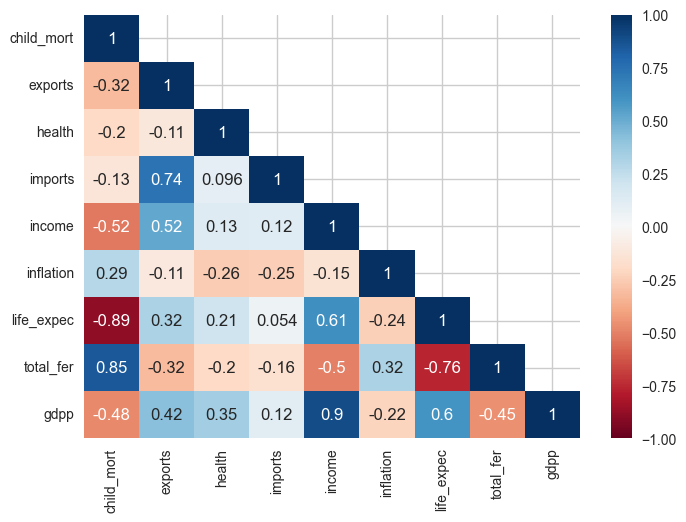

In [78]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu',mask=np.triu(data.corr(),k=1))
plt.show()

In [79]:
## Univariate Analysis 

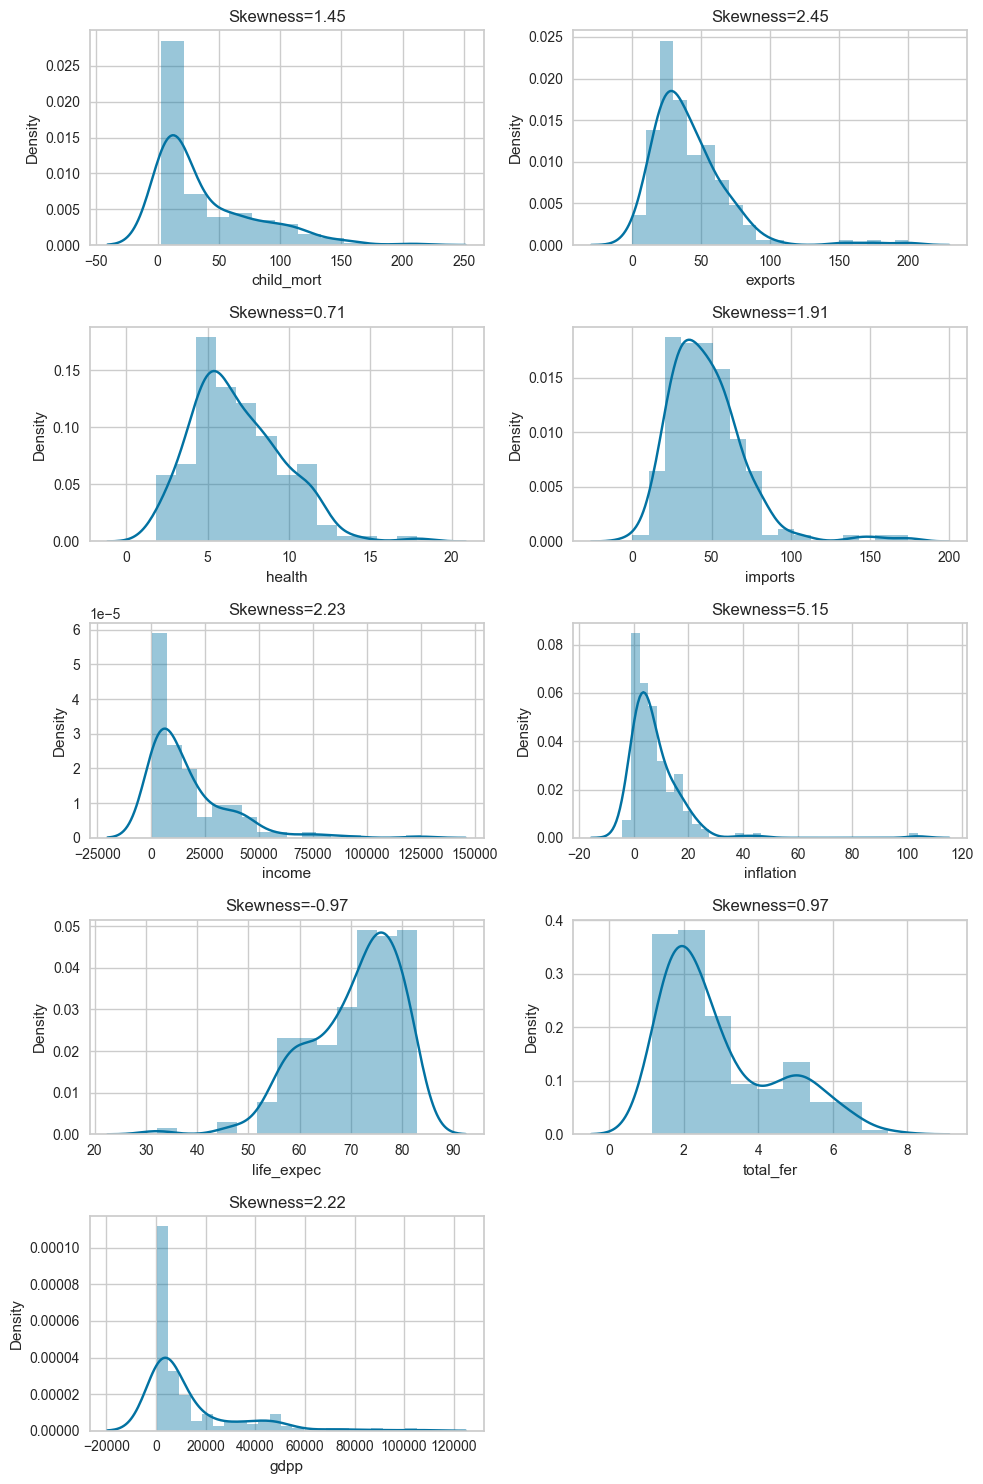

In [80]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [81]:
## Check for the outliers 

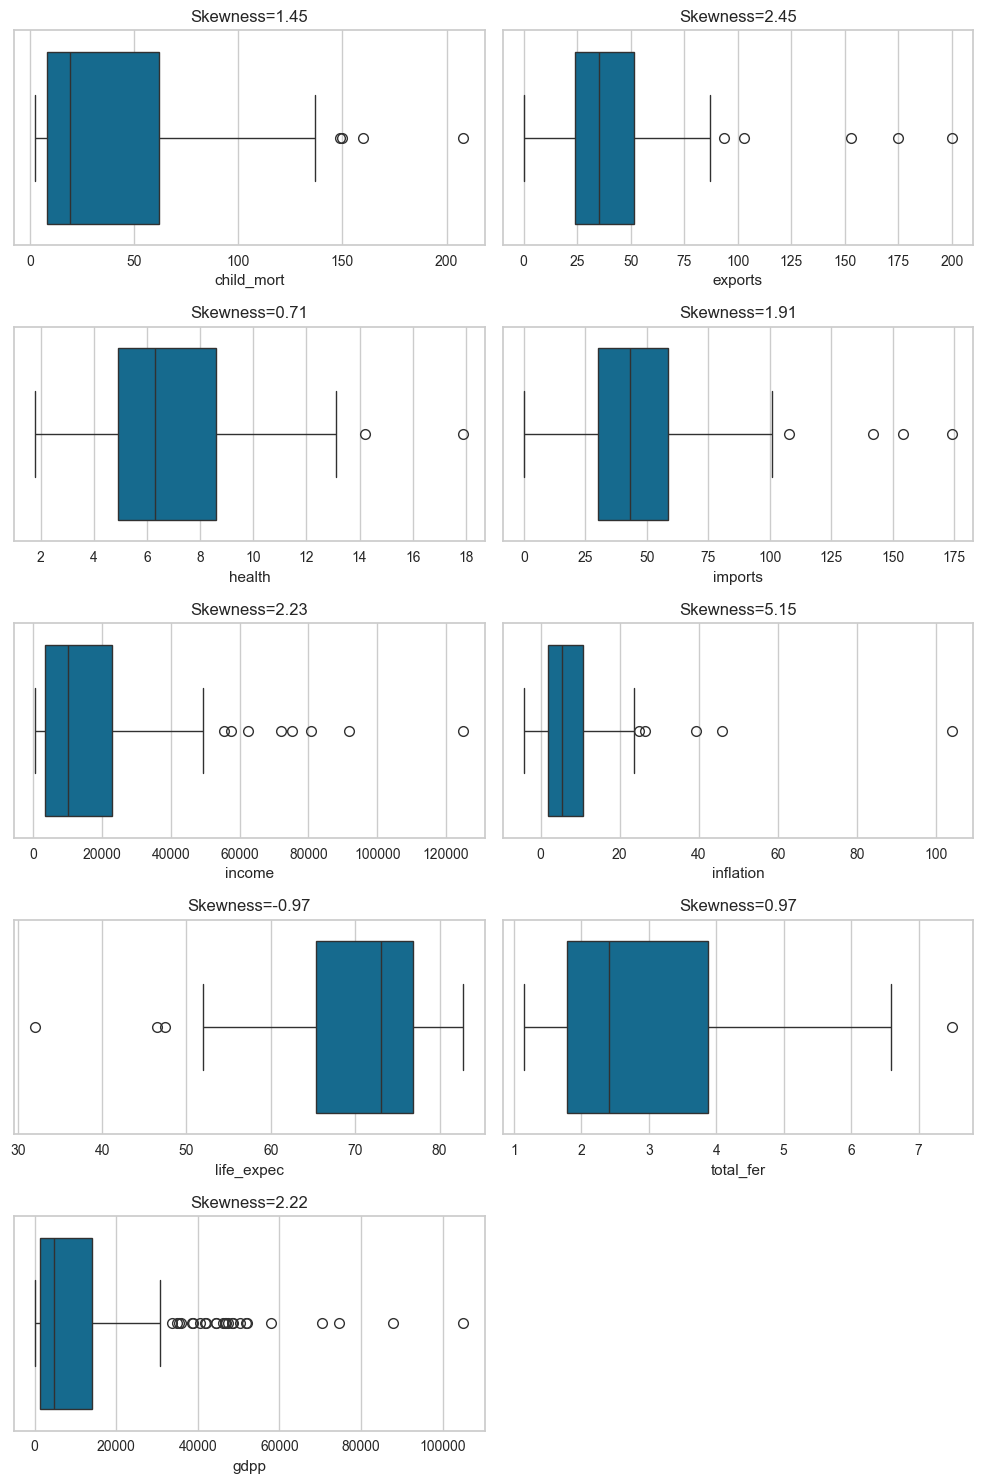

In [82]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

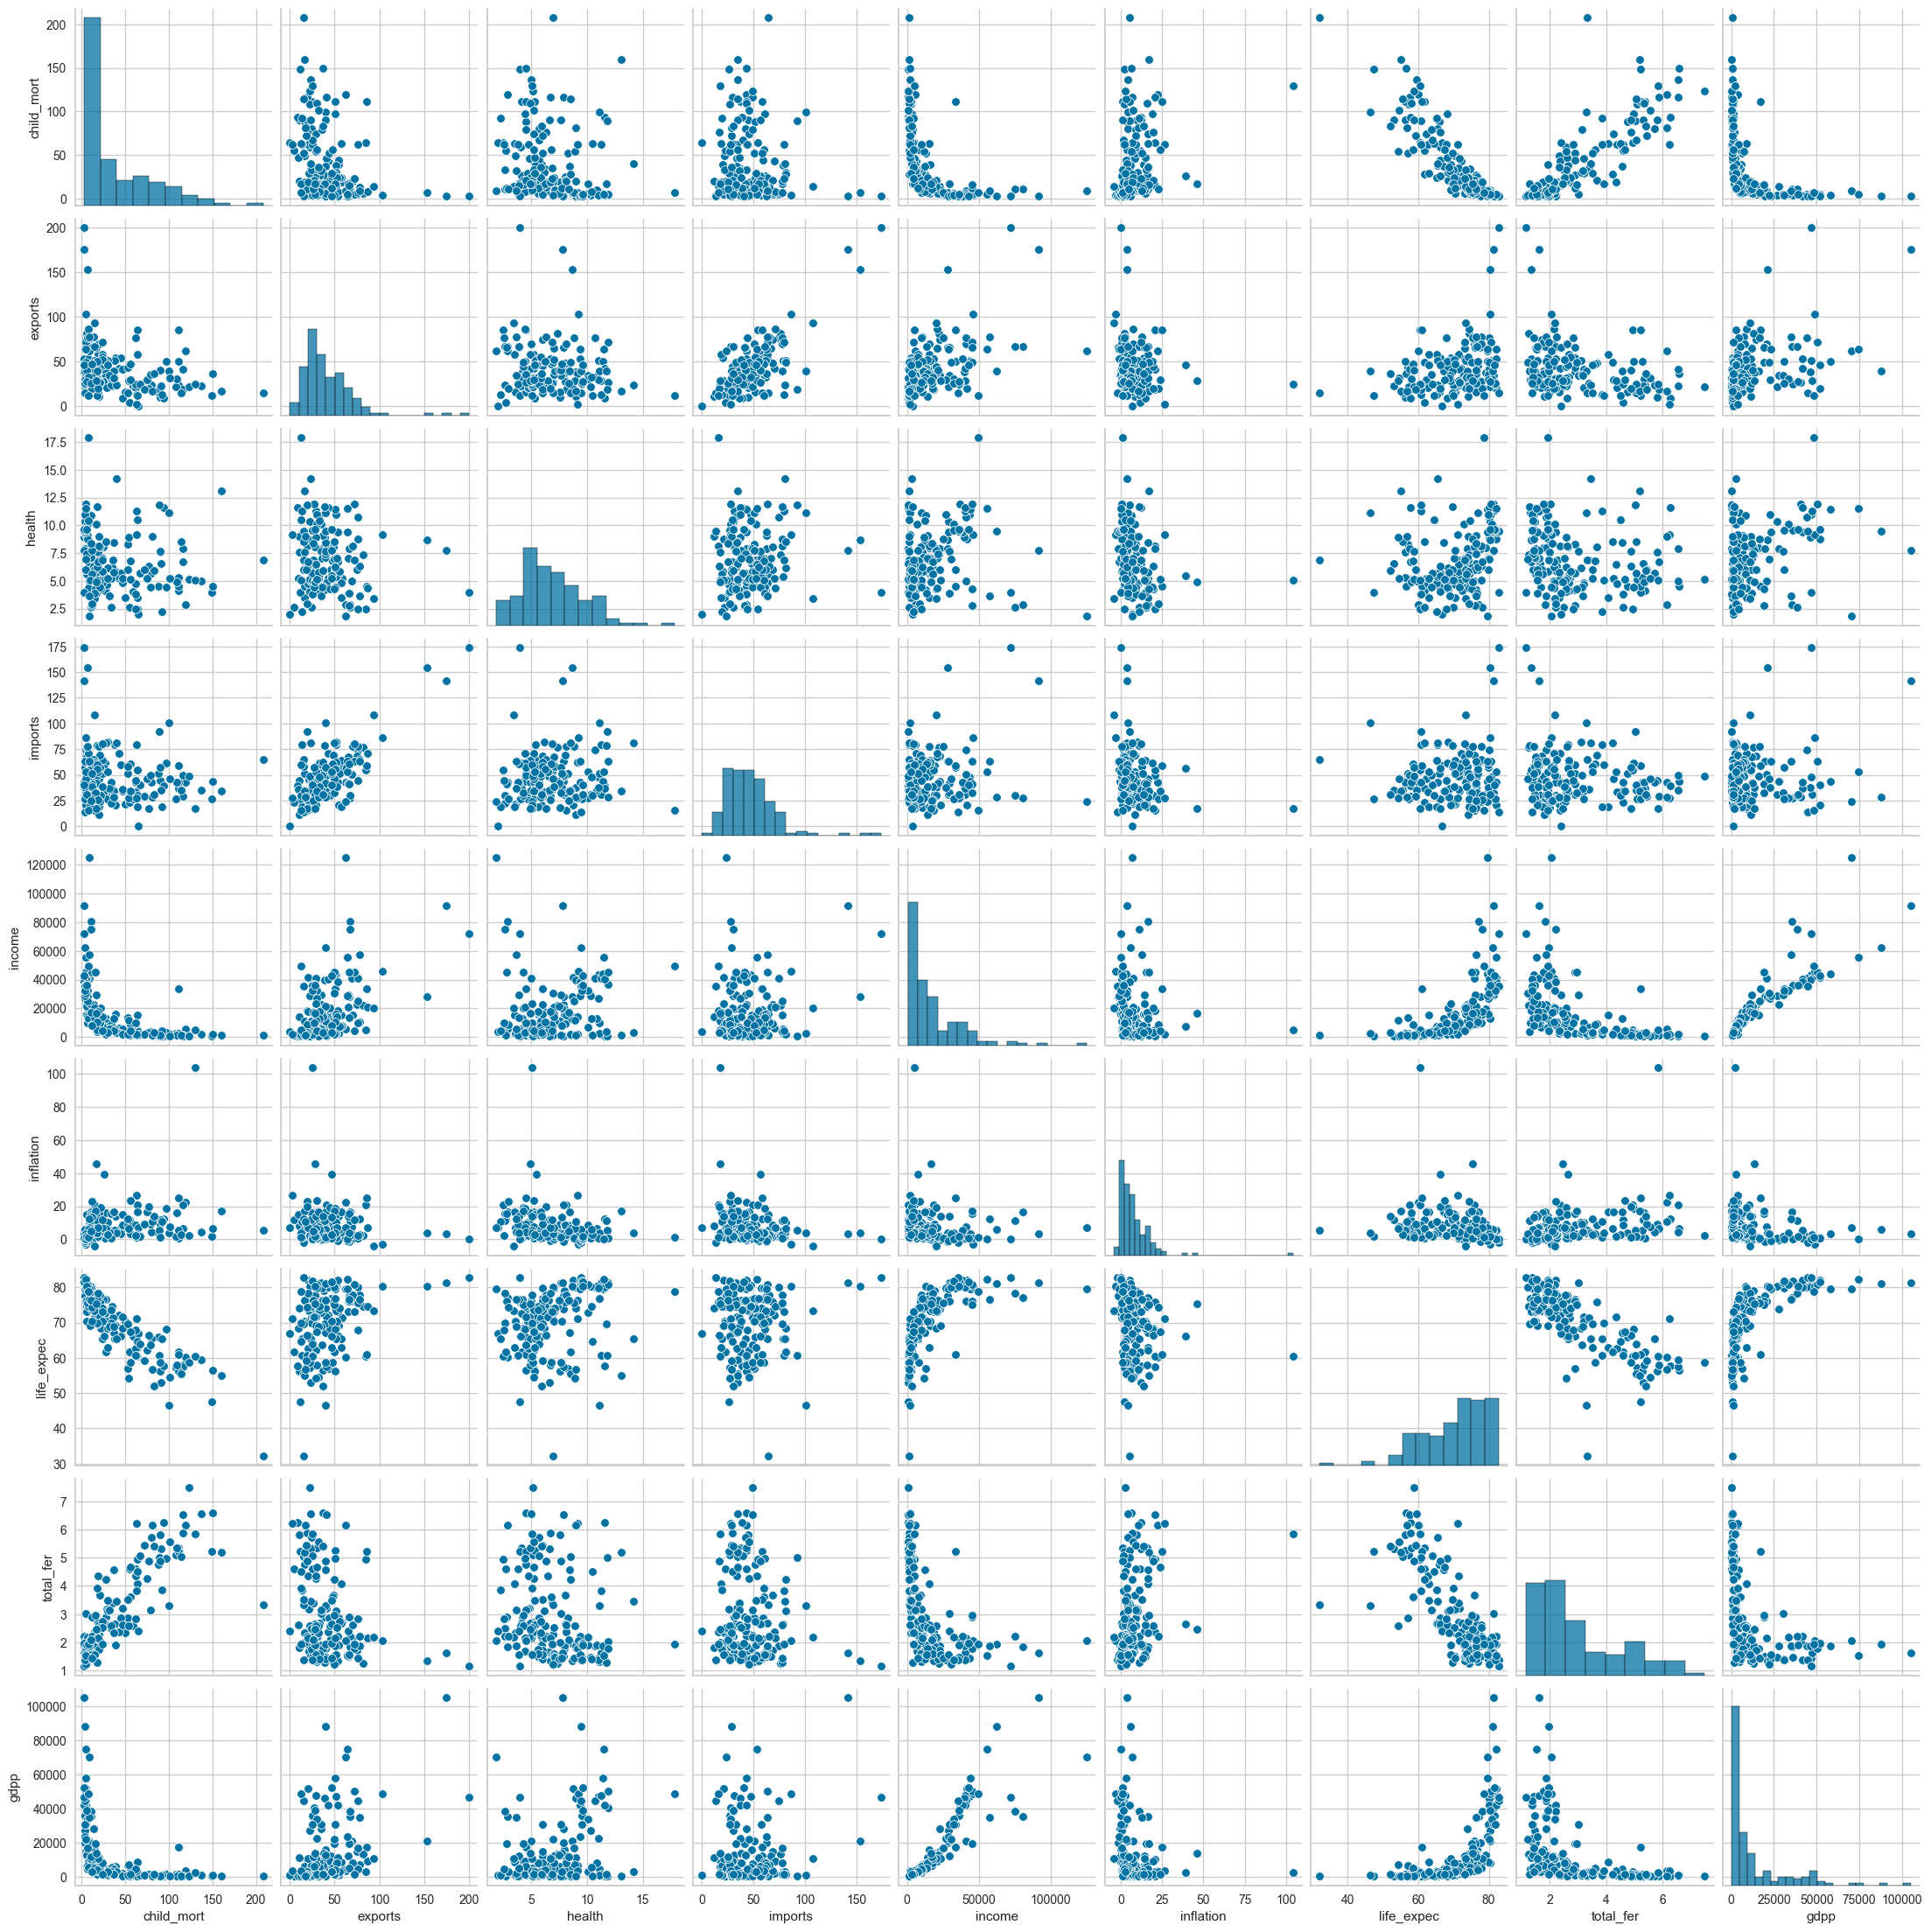

In [83]:
sns.pairplot(data)
plt.show()

## Clean the data 

In [84]:
## Check for missing values 

In [85]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [86]:
## Check for duplicates 

In [87]:
data.duplicated().sum()

0

**There are no missing values and dupliated rows in the data.**

In [88]:
## Treat the outliers (Capping the outliers)

In [89]:
for i in data.columns:
    q3,q1=np.percentile(data[i],(75,25))
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    data[i]=data[i].apply(lambda x : ul if x > ul else ll if x < ll else x )

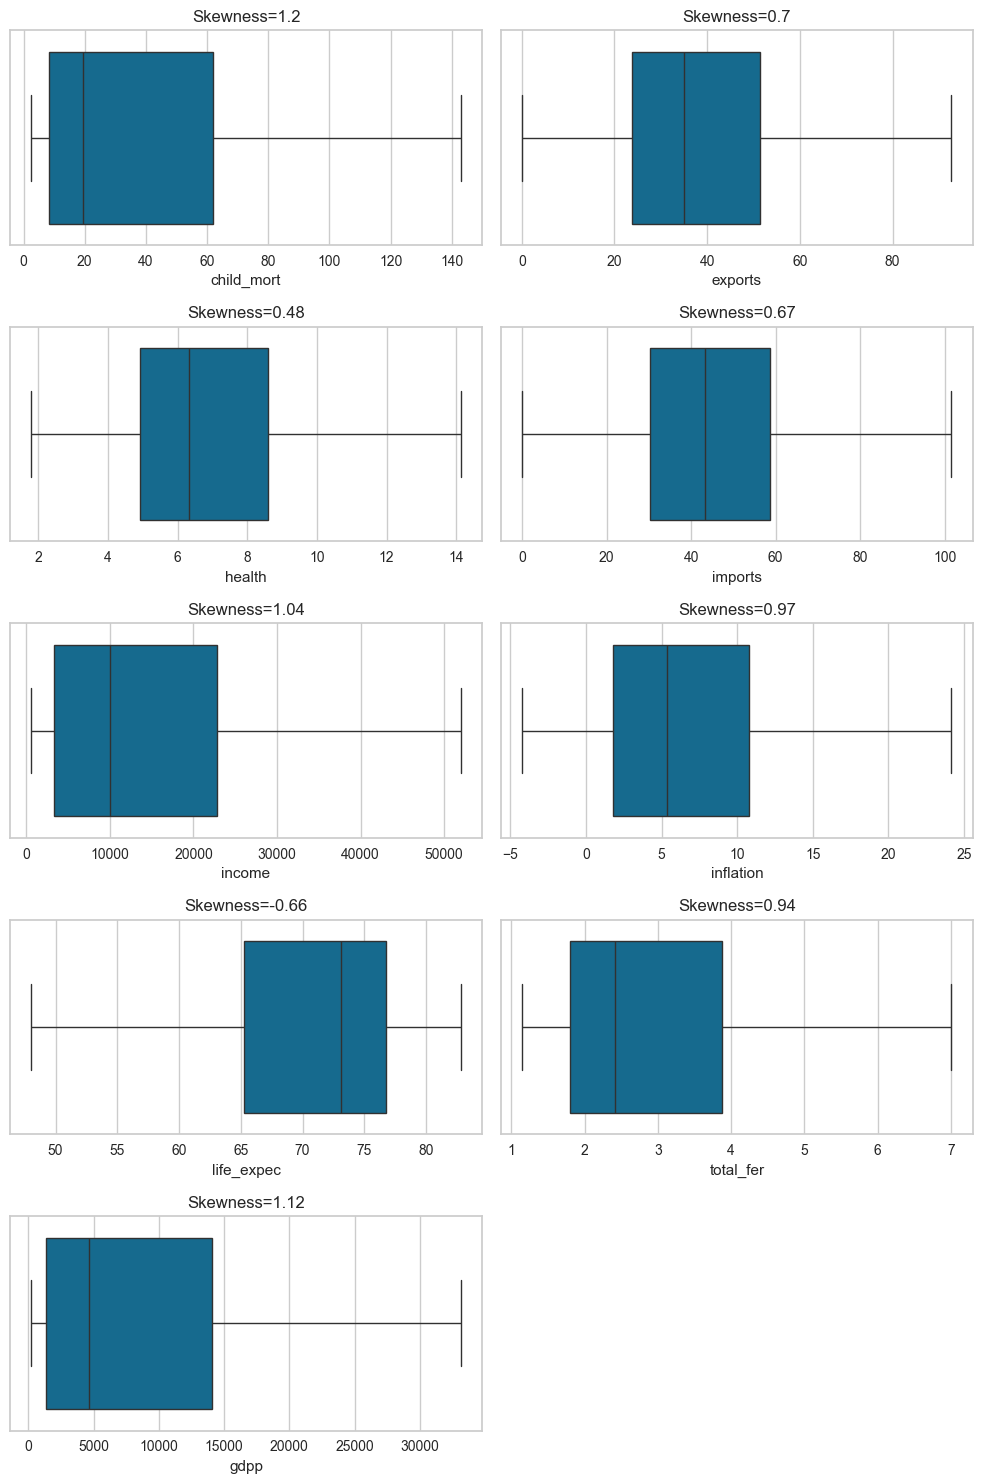

In [90]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## We will use scaled data for clustering 

In [91]:
sc=StandardScaler()

In [92]:
data_s=sc.fit_transform(data)

In [93]:
data_s=pd.DataFrame(data_s,columns=data.columns)

In [94]:
data_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
162,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
163,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
164,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954
165,0.485332,-0.449374,-0.606208,-0.565251,-0.754642,2.473489,-0.372341,1.149146,-0.780954


## PCA (Principal Component Analysis)

**For better cluster and better visualization**

In [95]:
pca=PCA(n_components=9)

In [96]:
pca.fit(data_s)

PCA(n_components=9)

In [97]:
## Let's use % of explaine variance to decide the no. of PC's (95% variance)

In [98]:
pca.explained_variance_ratio_.cumsum()

array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
       0.97118734, 0.98774592, 0.99674059, 1.        ])

In [99]:
pca_final=PCA(n_components=5)
pca_data=pca_final.fit_transform(data_s)

In [100]:
pca_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [101]:
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
Vanuatu,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
Venezuela,-0.240053,-1.742315,2.238331,-0.080500,1.318475
Vietnam,0.305579,2.152785,0.455745,-0.746171,1.383759


## Clustering

### K-Means Clustering

In [102]:
## Lets Identify the value of k

In [103]:
## Elbow plot

In [104]:
kelbow=KElbowVisualizer(KMeans(),k=10)

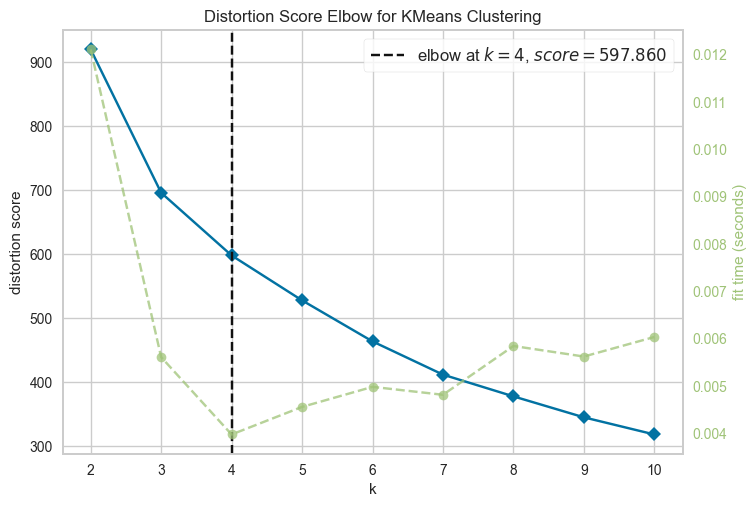

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
kelbow.fit(pca_data)
kelbow.show()

In [106]:
## Silhoutte Visualizer

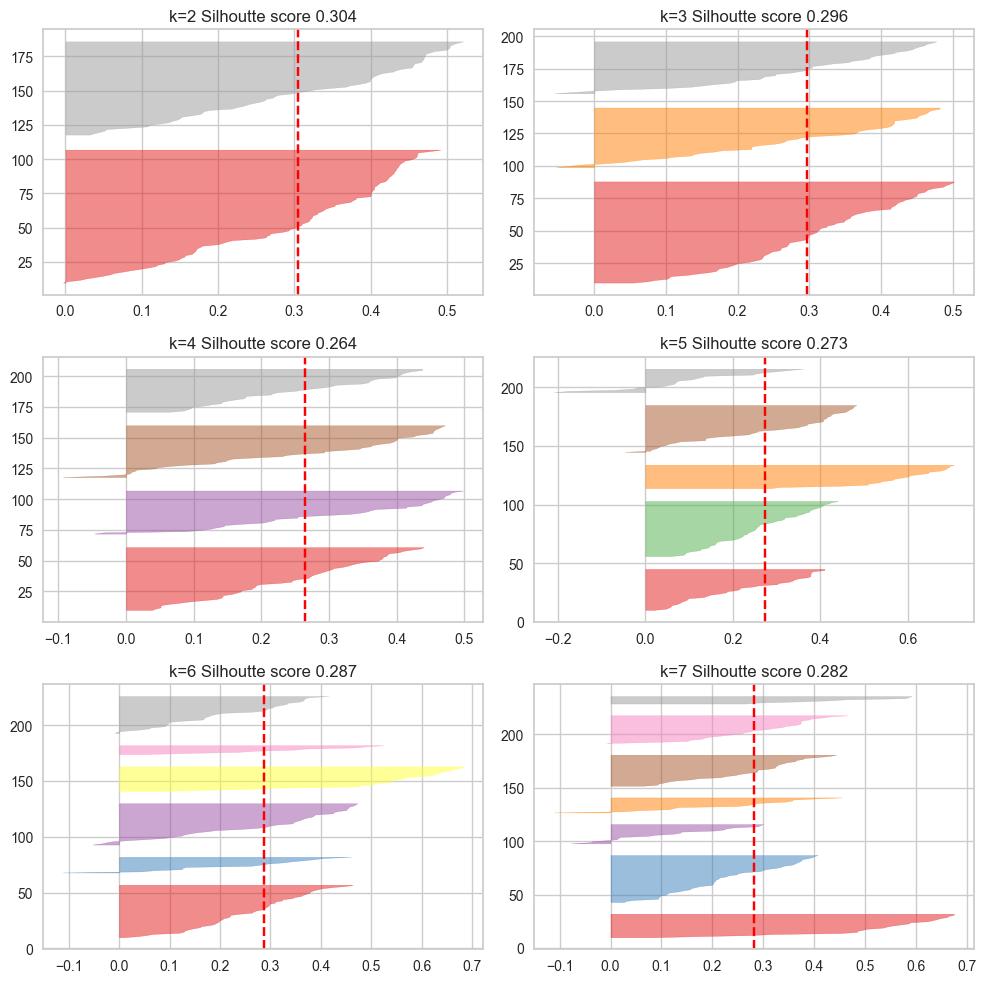

In [107]:
t=1
plt.figure(figsize=(10,10))
for i in range(2,8):
    plt.subplot(3,2,t)
    model = KMeans(n_clusters=i)
    sil_vis=SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'k={i} Silhoutte score {round(sil_vis.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

**We can go with k=3**

Reason:
* Although there is no outlier in k=2 but some significant clusters can be created with k=3
* With k=3 we will  have one more cluster in between which will be a subcluster of two clusters 

In [108]:
kmean=KMeans(n_clusters=3,random_state=2)

In [109]:
kmean_label=kmean.fit_predict(pca_data)

In [110]:
pd.Series(kmean_label).value_counts(normalize=True)*100

2    47.305389
1    28.143713
0    24.550898
Name: proportion, dtype: float64

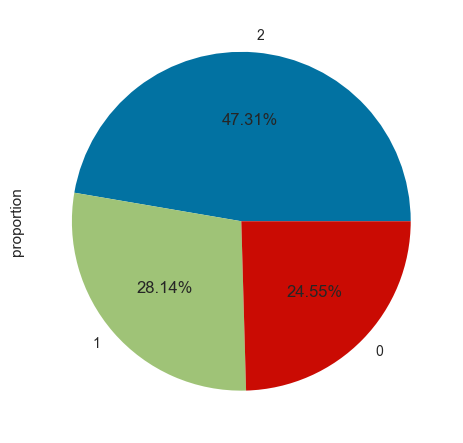

In [111]:
pd.Series(kmean_label).value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

In [112]:
## Visualize the clusters

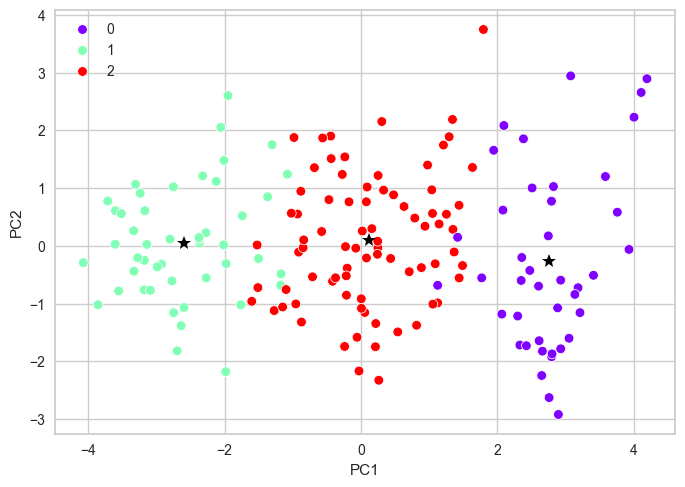

In [113]:
centroid=kmean.cluster_centers_
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label,palette='rainbow')
for i in range(3):
    plt.plot(centroid[i][0],centroid[i][1],marker='*',color='black',ms=10)
plt.show()

### Aggloromative Clustering

In [114]:
# Let's Make dist_mat and link_mat

In [115]:
dist_mat= euclidean_distances(pca_data)
link_mat = linkage(pca_data,method='ward')

In [116]:
## Dendrogram

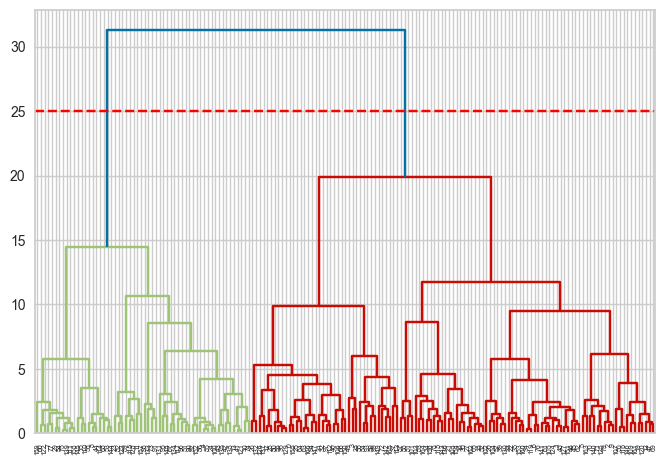

In [117]:
dendrogram(link_mat)
plt.axhline(y=25,ls='--',color='red')
plt.show()

**We can go with ward's Linkage method with k=2**

In [118]:
agglo=AgglomerativeClustering()

In [119]:
agglo_labels= agglo.fit_predict(pca_data)
print(f'Silhoute Score = {round(silhouette_score(pca_data,agglo_labels),3)}')

Silhoute Score = 0.303


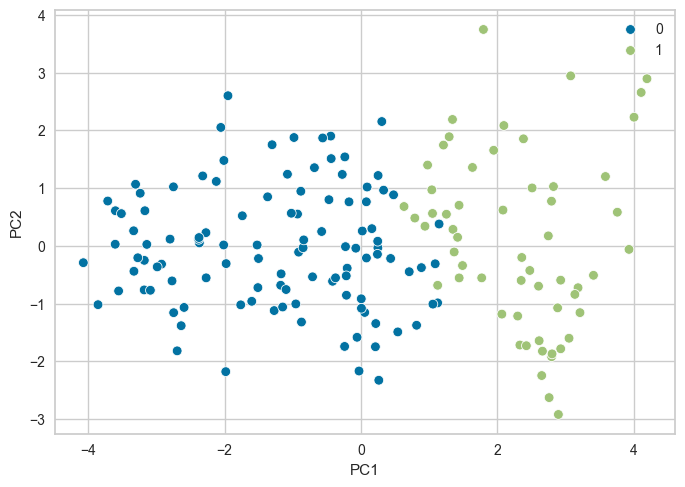

In [120]:
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=agglo_labels)
plt.show()

## Final Model & Business Interpretation


**Both the Algorithms gives approx 0.30 silhoutte score.eans cluster gives k=3and Aggloromative gives k=2. We need to decide which clustering model we should go with. Let's go with K-Means as Aggloromative is better for hierarchial data, while data has no such hierarchy.**


In [121]:
data['label']=kmean_label

**Business Interpretation**

In [122]:
data.groupby(by='label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,5.651220,52.719512,8.331951,47.598171,38988.780488,3.235171,79.514634,1.799756,28969.512195
1,91.182979,28.225936,6.253830,41.233317,3738.574468,10.215426,59.777660,4.987819,1808.297872
2,22.510127,39.438671,6.314177,47.714873,11198.101266,7.178468,72.546835,2.324177,5771.189873


**Inference**

* 2- Has lowest Child_mort than 0 and 1 has highest Child_mort 
* % of GDP in Exports is highest for 2 and lowest for 0 ,while 1 has average exports.
* Health index for 2 is clearly better that 0 and 1 both.
*
*
*
*
*

In [123]:
data['label']=data['label'].map({1:'Underdeveloped',2:'Developing',0:'Developed'})

In [124]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing
Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,Developing
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,Developing


In [125]:
## Let's visualize the labels

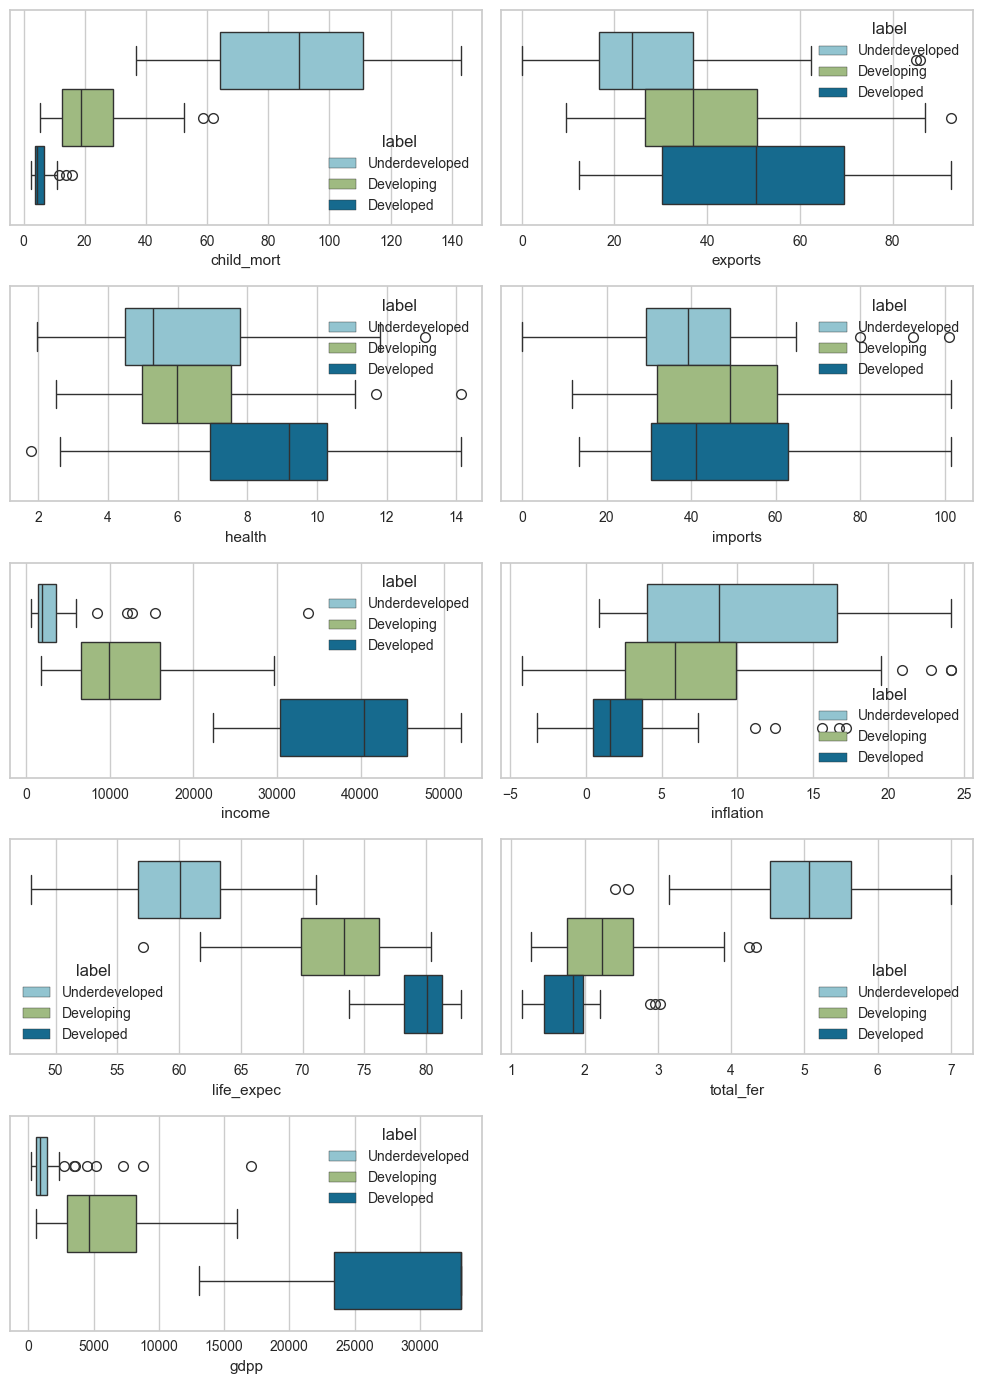

In [126]:
t=1
plt.figure(figsize=(10,14))
for i in data.columns:
    if i!='label':
        plt.subplot(5,2,t)
        sns.boxplot(data=data,x=i,hue='label',palette=['c','g','b'])
        t+=1
plt.tight_layout()
plt.show()

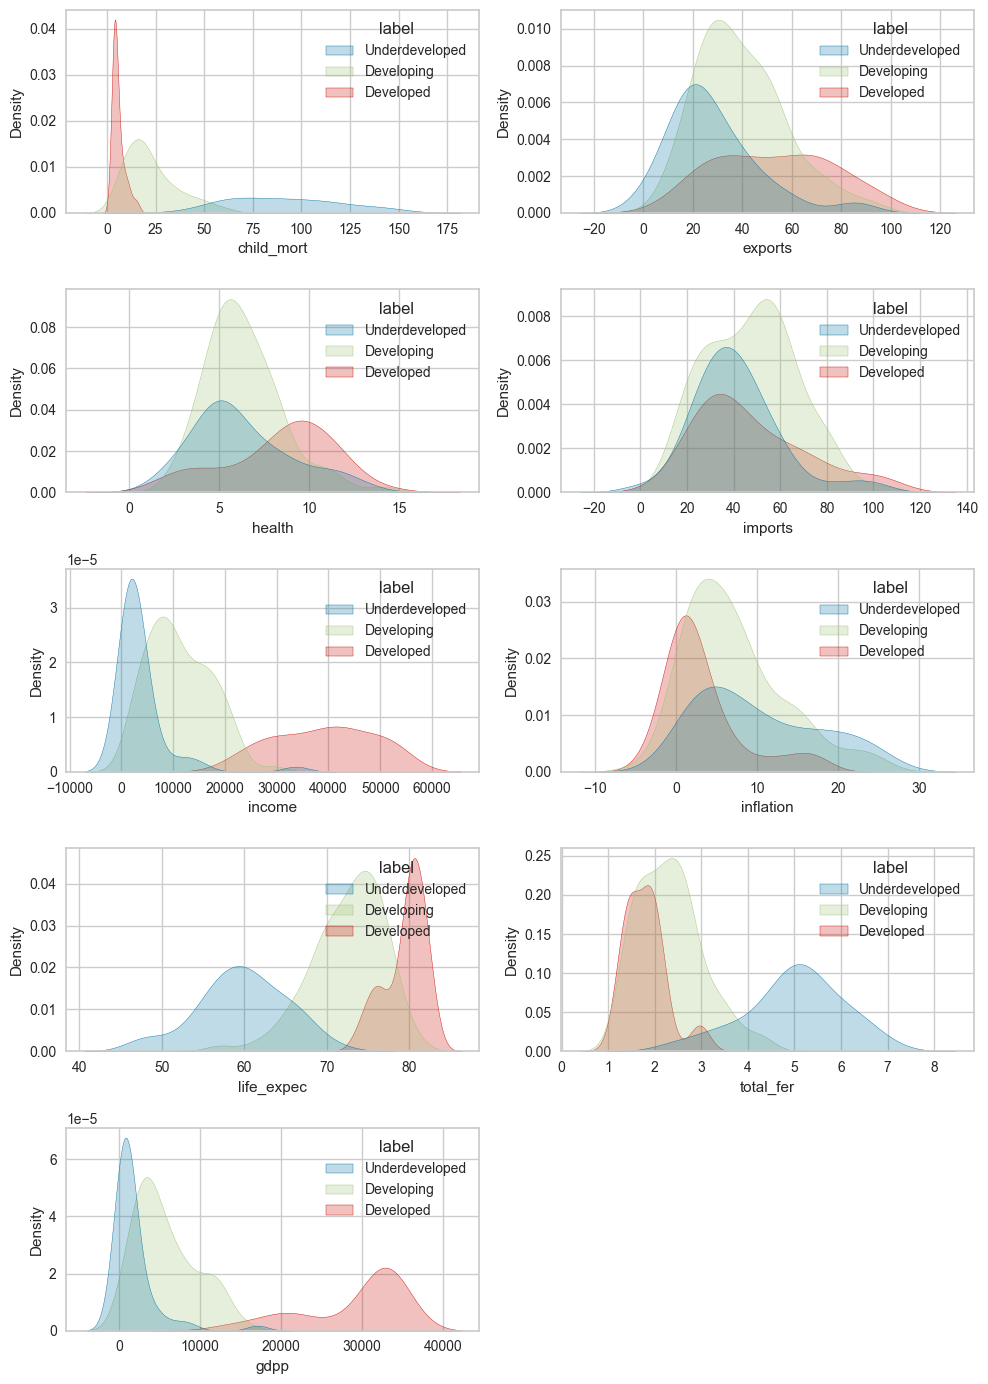

In [127]:
t=1
plt.figure(figsize=(10,14))
for i in data.columns:
    if i!='label':
        plt.subplot(5,2,t)
        sns.kdeplot(data=data,x=i,hue='label',fill=True)
        t+=1
plt.tight_layout()
plt.show()

In [128]:
## List of cunteries in both the classes 

In [129]:
data[data['label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

In [130]:
data[data['label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', 'Tonga', 'Tunisia', 'Tu

In [131]:
data[data['label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

### World Map

In [132]:
world_data=pd.DataFrame({'Label':data['label']})
world_data.reset_index(inplace=True)

In [133]:
world_data.head()

,country,Label
0,Afghanistan,Underdeveloped
1,Albania,Developing
2,Algeria,Developing
3,Angola,Underdeveloped
4,Antigua and Barbuda,Developing


In [134]:
fig = px.choropleth(data_frame=world_data,locationmode='country names',
                   locations='country',color=data['label'],
                    color_discrete_map={'Developed': '#87CEEB',      
                                       'Developing': '#90EE90',    
                                   'Underdeveloped': '#FFB6C1' 
                                                             },
                    title="Country Development Status"
)

fig.update_geos(projection_type='natural earth')
fig.update_layout(title='Country Development Classification')
fig.show()